# 1.1 Install Dependencies and Setup

In [4]:
!pip3 install tensorflow opencv-python matplotlib

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/f9/14/67e9b2b2379cb530c0412123a674d045eca387dfcfa7db1c0028857b0a66/tensorflow-2.16.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached tensorflow-2.16.1-cp311-cp311-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/77/df/b56175c3fb5bc058774bdcf35f5a71cf9c3c5b909f98a1c688eb71cd3b1f/opencv_python-4.9.0.80-cp37-abi3-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for fl

  Obtaining dependency information for namex from https://files.pythonhosted.org/packages/73/59/7854fbfb59f8ae35483ce93493708be5942ebb6328cd85b3a609df629736/namex-0.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for optree from https://files.pythonhosted.org/packages/cc/b8/33127d52de868d2aabc14ec6f53cb2dffafd14c5c708f50d171552a3a451/optree-0.11.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 999.2 kB/s eta 0:00:00 0:00:01
  Obtaining dependency information for tensorboard-data-server<0.8.0,>=0.7.0 from https://files.pythonhosted.org/packages/7a/13/e503968fefabd4c6b2650af21e110aa8466fe21432cd7c43a84577a89438/tensorboard_data_server-0.7.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 4.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 7.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 2.8 MB/s eta 0:00:0

In [5]:
! pip list

Package                       Version
----------------------------- ------------
absl-py                       2.1.0
aext_assistant                0.4.0
aext_assistant_server         0.4.0
aext_core                     0.4.0
aext_core_server              0.4.0
aext_shared                   0.4.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-b

In [7]:
import tensorflow as tf
import os

In [12]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [13]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [9]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True) #limit the momory need

# 1.2 Remove Dodgy Images

In [25]:
#this block helps to get rid of all the images with incorrect extensions,corrupted,etc
import cv2
import imghdr # helps in checking the image extension
from matplotlib import pyplot as plt

In [15]:
data_dir = 'data'

In [33]:
files = os.listdir(data_dir)

# Check if there are files in the directory
if files:
    # Remove the second file in the list (index 1)
    file_to_remove = os.path.join(data_dir, files[1])
    os.remove(file_to_remove)
    print(f"File '{file_to_remove}' removed successfully.")
else:
    print("No files in the directory.")

File 'data/.DS_Store' removed successfully.


In [19]:
os.listdir(os.path.join(data_dir,'happy')) #prints all the images in the happy folder

['05-12-21-happy-people.jpg',
 'flat-design-youth-day-celebration_23-2148593998.jpg',
 'image22.jpeg',
 'Happy.jpg',
 '7-principles-of-successful-and-happy-people.png',
 '170404-happy-workers-feature.jpg',
 'image18.jpeg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 'image14.jpeg',
 'image15.jpeg',
 'young-and-happy-people-vector-15114154.jpg',
 'Happiness-Habits-10-Things-Happy-People-Do-Before-Bed-800x450.jpg',
 'habits-of-happy-people-jpg.jpg',
 'friends_190412.jpg',
 'vector.svg',
 'hqdefault.jpg',
 'happy-people-jump-with-raised-arms-characters-win_107791-14884.jpg',
 'image19.jpeg',
 '360_F_582239379_7n6b6kBXogmFRvSz5Ncgr7aQrZBEcO1p.jpg',
 'getty_107808334_121413.jpg',
 '1920px-face-smile.svg_.png',
 'group-people-posing-photo-with-words-happy-bottom_577115-4097.jpg',
 'image23.jpeg',
 'freedom-serenity-concept-female-model-ecstatic-enjoyment-mixed-race-34800382.jpg',
 'vector9.svg',
 'friends-happy-190821-1490x838.jpg',
 'image28.jpeg',
 'business

In [16]:
image_exts = ['jpeg','jpg','bmp','png']

In [21]:
img = cv2.imread(os.path.join('data','happy','smile.woman_.jpg')) 


In [23]:
img #its a numpy array

array([[[  1, 189, 140],
        [  1, 189, 140],
        [  1, 189, 140],
        ...,
        [  0, 153, 114],
        [  0, 153, 114],
        [  0, 153, 114]],

       [[  1, 189, 140],
        [  1, 189, 140],
        [  1, 189, 140],
        ...,
        [  0, 153, 114],
        [  0, 153, 114],
        [  0, 153, 114]],

       [[  1, 189, 140],
        [  1, 189, 140],
        [  1, 189, 140],
        ...,
        [  0, 153, 114],
        [  0, 153, 114],
        [  0, 153, 114]],

       ...,

       [[  0, 157, 117],
        [  0, 157, 117],
        [  0, 157, 117],
        ...,
        [  0, 131,  98],
        [  0, 131,  98],
        [  0, 131,  98]],

       [[  0, 157, 117],
        [  0, 157, 117],
        [  0, 157, 117],
        ...,
        [  0, 131,  98],
        [  0, 131,  98],
        [  0, 131,  98]],

       [[  0, 157, 117],
        [  0, 157, 117],
        [  0, 157, 117],
        ...,
        [  0, 131,  98],
        [  0, 131,  98],
        [  0, 131,  98]]

In [22]:
img.shape # 3 shows colored image

(3844, 5125, 3)

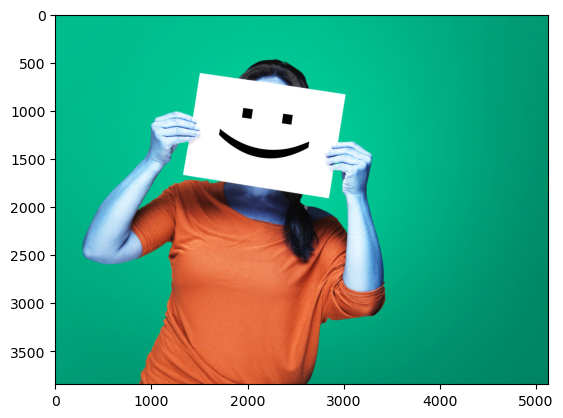

In [26]:
plt.imshow(img)

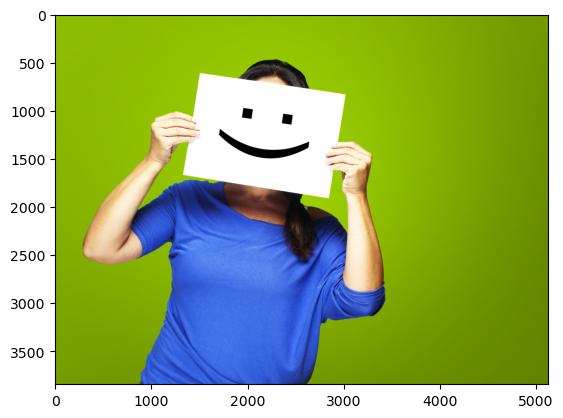

In [28]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) #this statement fix the color
plt.show()

In [34]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("image not in ext list{}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

image not in ext listdata/sad/sad-young-woman-feeling-stressed-footage-107160392_iconl.jpeg
image not in ext listdata/sad/.DS_Store
image not in ext listdata/sad/depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
image not in ext listdata/sad/depositphotos_36254119-stock-photo-desperate-sad-people.jpg


# 1.3 Load Data

In [36]:
tf.data.Dataset #tensorflow has a dataset api-> this allows you to do datapipeline which allows u to scale on much larger datasets but it also gives u a repeatable set of data that u are going to apply on your data

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [37]:
#tf.data.Dataset.list_files #helps in wildcard search

In [38]:
import numpy as np

In [40]:
# tf.keras.utils.image_dataset_from_directory??

In [82]:
data = tf.keras.utils.image_dataset_from_directory('data') #keras have a data pipeline direct function or helper built into it

Found 178 files belonging to 2 classes.


In [83]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [84]:
data_iterator = data.as_numpy_iterator()

In [85]:
batch = data_iterator.next()

In [86]:
batch

(array([[[[0.00000000e+00, 7.00000000e+00, 1.50000000e+01],
          [0.00000000e+00, 7.00000000e+00, 1.50000000e+01],
          [0.00000000e+00, 7.00000000e+00, 1.30000000e+01],
          ...,
          [3.00000000e+00, 1.60000000e+01, 3.20000000e+01],
          [3.25000000e+00, 1.62500000e+01, 3.22500000e+01],
          [3.00000000e+00, 1.60000000e+01, 3.20000000e+01]],
 
         [[0.00000000e+00, 7.00000000e+00, 1.50000000e+01],
          [0.00000000e+00, 7.00000000e+00, 1.50000000e+01],
          [0.00000000e+00, 7.00000000e+00, 1.30000000e+01],
          ...,
          [3.00000000e+00, 1.60000000e+01, 3.20000000e+01],
          [3.25000000e+00, 1.62500000e+01, 3.22500000e+01],
          [3.00000000e+00, 1.60000000e+01, 3.20000000e+01]],
 
         [[0.00000000e+00, 7.00000000e+00, 1.50000000e+01],
          [0.00000000e+00, 7.00000000e+00, 1.50000000e+01],
          [0.00000000e+00, 7.00000000e+00, 1.30000000e+01],
          ...,
          [3.00000000e+00, 1.60000000e+01, 3.2000

In [87]:
type(batch)

tuple

In [88]:
len(batch)

2

In [89]:
#images represented as numpy array
batch[0].shape #return (batchSize,image_size,tells pic is colored or not) imageSize = (256,256)

(32, 256, 256, 3)

In [90]:
batch[1]  #here 1 represent either happy or sad //ly 0 will do

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int32)

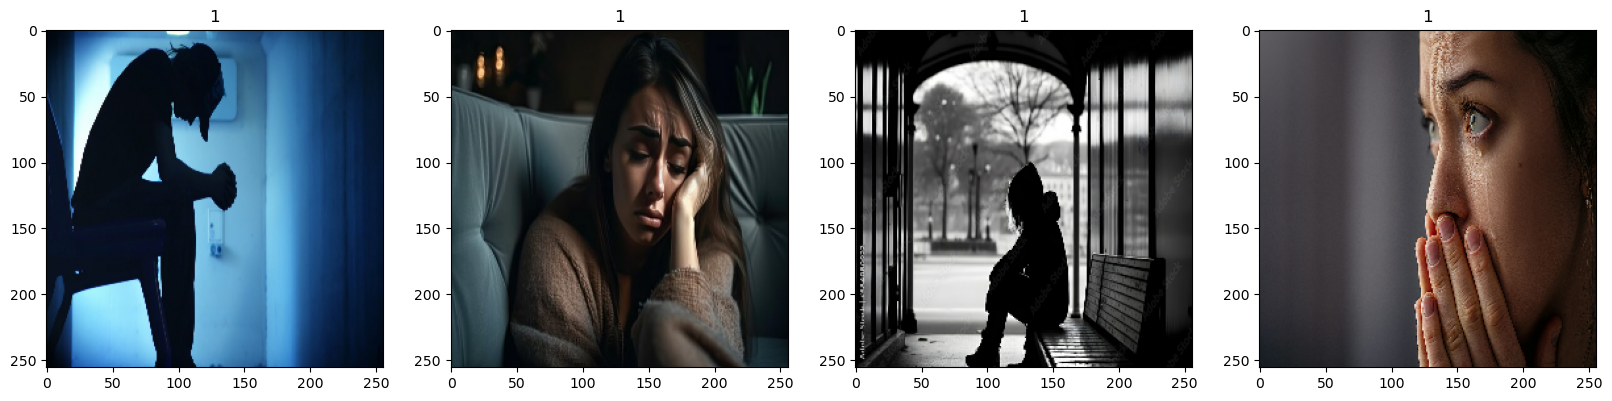

In [91]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]) :
    ax[idx]. imshow(img.astype(int))
    ax[idx]. title.set_text(batch[1][idx])
    
    # this tells that 1 represents sad and 0 represents happy

In [92]:
print(batch[0].min())
print(batch[0].max())
# in preprocessing we will reduce the range from 0 to 255 -> 0 to 1(in deep learing model its good for data to be as small as possible)

0.0
255.0


In [93]:
scaled = batch[0]/255

In [94]:
print(scaled.min())
print(scaled.max())

0.0
1.0


# 2 Preprocess Data

## 2.1 Scale data

In [95]:
# scaling data using capability of data pipelining -> this a transformation step on data pipeline
data = data.map(lambda x,y: (x/255,y)) #here x-> images (scaling done from 0-255 to 0-1) and y has no transformation

In [96]:
scaled_iterator = data.as_numpy_iterator()

In [97]:
batch = scaled_iterator.next()

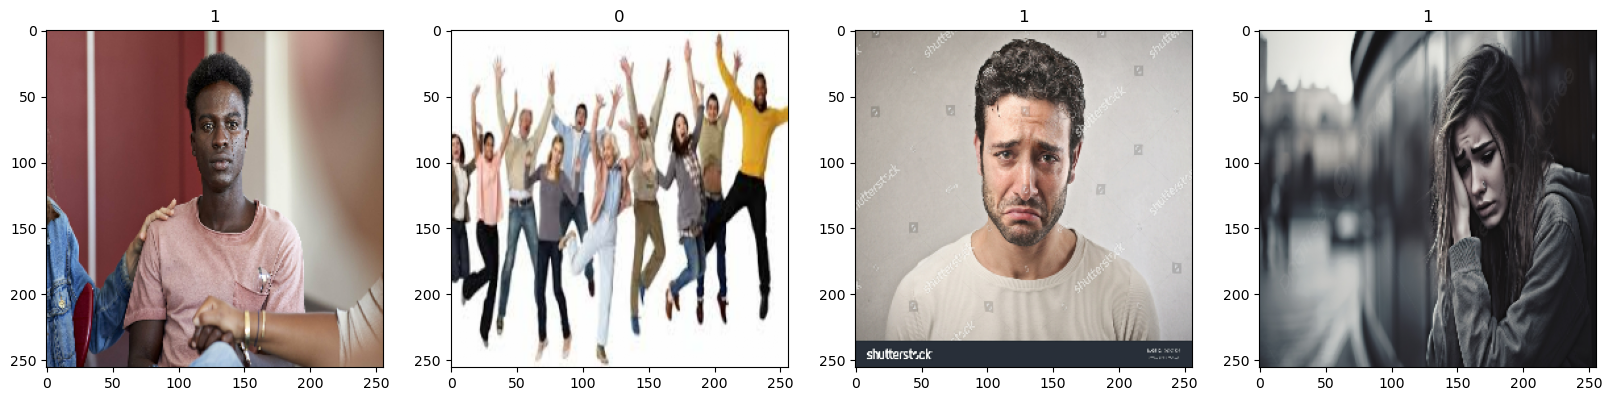

In [98]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]) :
    ax[idx]. imshow(img)
    ax[idx]. title.set_text(batch[1][idx])

## 2.2 Split data

In [102]:
len(data)

6

In [108]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [109]:
train_size+val_size+test_size

6

In [114]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [115]:
len(train)

4

In [116]:
len(val)

1

In [117]:
len(test)

1

# Deep Model

## 3.1 Building deep learning model